In [1]:
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 15
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
# %matplotlib widget
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))

import os
# import csv
import math

from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]
    
    
# Define paths
rootdir_data = os.getcwd() +"\\..\\DanskeData\\" 

path_data = rootdir_data + "ssi_data\\"
path_dash = rootdir_data + "ssi_dashboard\\"
path_vacc = rootdir_data + "ssi_vacc\\"

path_figs = os.getcwd() +"\\..\\Figures\\" 

saveFigures is set to: True
Done loading packages


# Cases, fine age split

In [2]:

firstDate = np.datetime64('2021-10-01')

latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir
latestdir

dfAge = pd.read_csv(latestdir+'\\Regionalt_DB\\18_fnkt_alder_uge_testede_positive_nyindlagte.csv',delimiter=';',encoding='latin1',dtype=str)
dfAge['Nyindlagte pr. 100.000 borgere'] = pd.to_numeric(dfAge['Nyindlagte pr. 100.000 borgere'].str.replace(',','.'))
dfAge['Positive pr. 100.000 borgere'] = pd.to_numeric(dfAge['Positive pr. 100.000 borgere'].str.replace(',','.'))
dfAge['Testede pr. 100.000 borgere'] = pd.to_numeric(dfAge['Testede pr. 100.000 borgere'].str.replace(',','.'))
dfAge['Antal testede'] = pd.to_numeric(dfAge['Antal testede'])
dfAge['Antal positive'] = pd.to_numeric(dfAge['Antal positive'])

dfAge.tail(18)


,Uge,Aldersgruppe,Testede pr. 100.000 borgere,Positive pr. 100.000 borgere,Nyindlagte pr. 100.000 borgere,Antal testede,Antal positive
886,2022-W01,0-2,6834,1370,37.6,12738,2553
887,2022-W01,3-5,19210,2650,6.4,35931,4956
888,2022-W01,6-11,19611,2478,5.7,72148,9117
889,2022-W01,12-15,25195,3110,7.3,68608,8469
890,2022-W01,16-19,34793,5602,13.1,95500,15376
891,2022-W01,20-39,25850,3241,19.1,384713,48227
892,2022-W01,40-64,26306,1685,15.6,497074,31836
893,2022-W01,65-79,10555,524,23.6,95359,4737
894,2022-W01,80+,11172,471,57.2,32600,1375
895,2022-W02,0-2,12076,2588,56.9,22507,4823


In [3]:
# Calculate dates
import datetime
weekDTs = [np.datetime64(datetime.datetime.strptime(d[:4] + '-W'+d[6:8]+'-1', "%Y-W%W-%w")) for d in dfAge.Uge]
dfAge['Dato'] = weekDTs

# Remove everything before 2021-01-01
dfAge = dfAge[dfAge.Dato > np.datetime64('2020-12-31')]

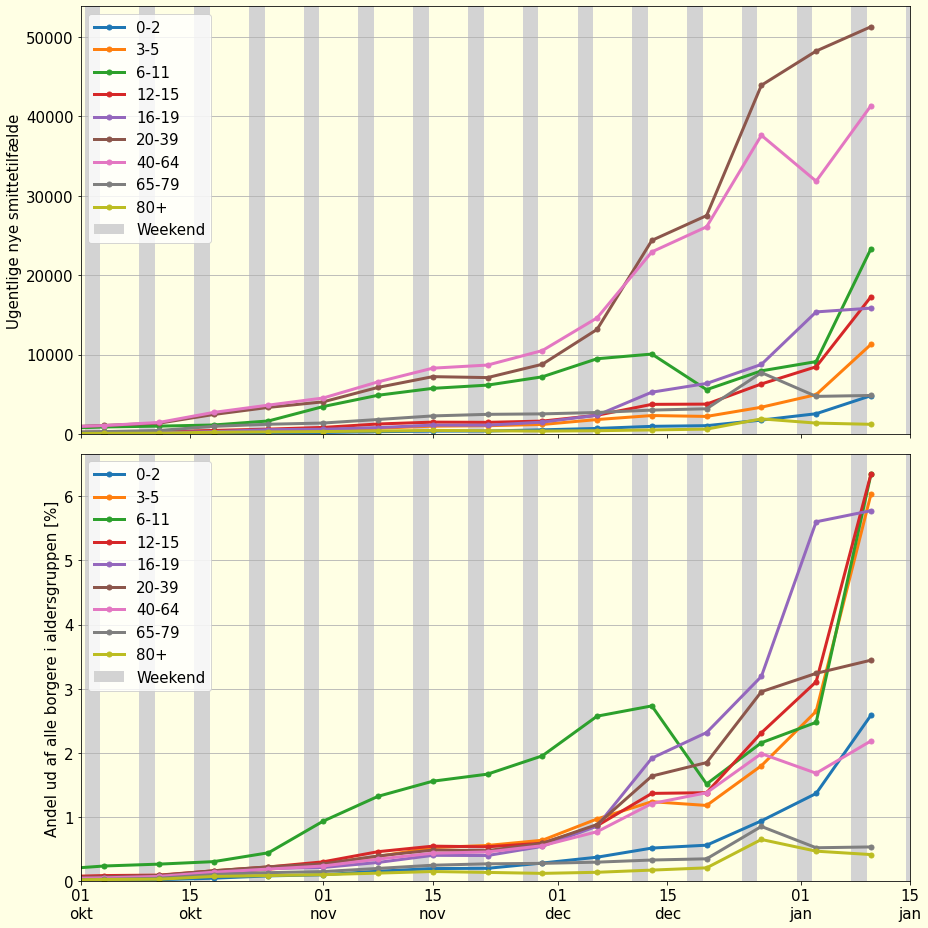

In [4]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(13,13))

fig.patch.set_facecolor('xkcd:off white')
ax1.set_facecolor('xkcd:off white')
ax2.set_facecolor('xkcd:off white')

for curAge in dfAge.Aldersgruppe.unique():
    thisdf = dfAge[dfAge.Aldersgruppe == curAge]
    ax1.plot(thisdf.Dato,thisdf['Antal positive'],'.-',label=curAge)
    # ax2.plot(thisdf.Dato,thisdf['Positive pr. 100.000 borgere'],'.-',label=curAge)
    ax2.plot(thisdf.Dato,thisdf['Positive pr. 100.000 borgere']/1000,'.-',label=curAge)

# Draw weekends
# firstSunday = np.datetime64('2021-01-03')
firstSunday = np.datetime64('2021-10-03')
numWeeks = 52
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
    ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')

ax1.set_ylabel('Ugentlige nye smittetilfælde')
# ax2.set_ylabel('Ugentlige nye smittetilfælde per 100.000')
ax2.set_ylabel('Andel ud af alle borgere i aldersgruppen [%]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=firstDate,right=thisdf.Dato.max()+np.timedelta64(5,'D'))
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.grid(axis='y')
ax2.grid(axis='y')

fig.tight_layout()


fig.savefig(path_figs+'Agedistribution_CasesWeekly')

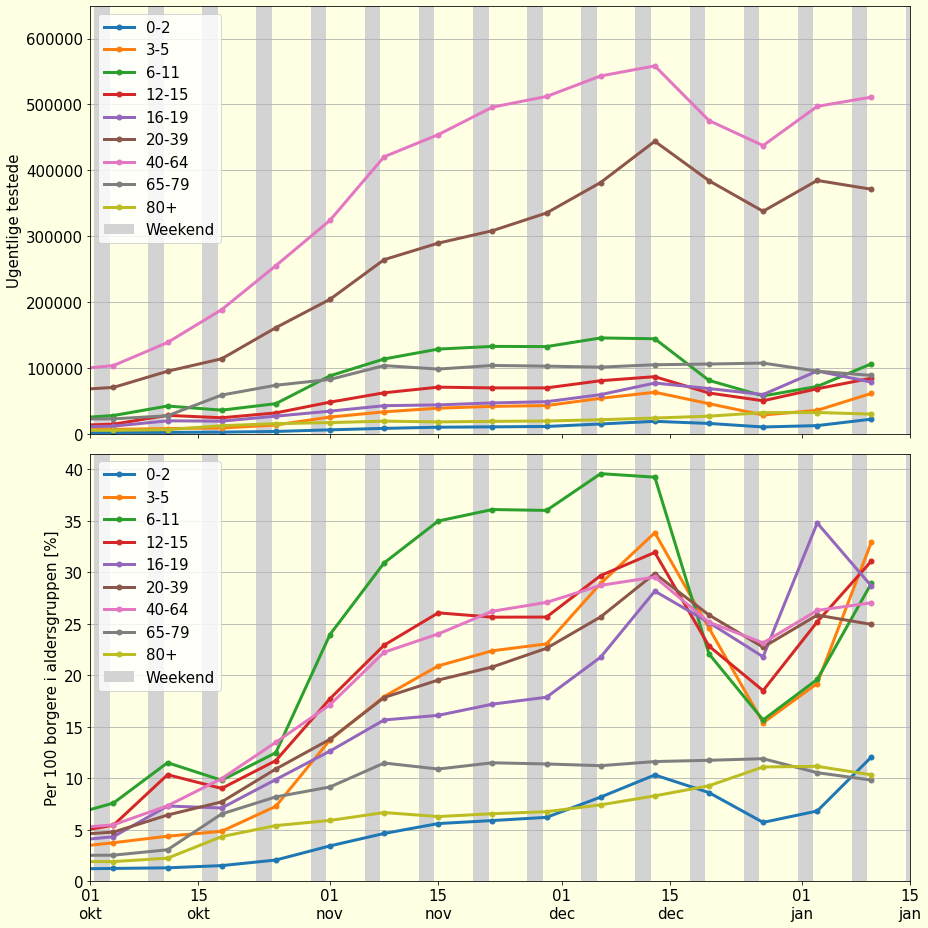

In [5]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(13,13))

fig.patch.set_facecolor('xkcd:off white')
ax1.set_facecolor('xkcd:off white')
ax2.set_facecolor('xkcd:off white')

for curAge in dfAge.Aldersgruppe.unique():
    thisdf = dfAge[dfAge.Aldersgruppe == curAge]
    ax1.plot(thisdf.Dato,thisdf['Antal testede'],'.-',label=curAge)
    ax2.plot(thisdf.Dato,thisdf['Testede pr. 100.000 borgere']/1000,'.-',label=curAge)

# Draw weekends
# firstSunday = np.datetime64('2021-01-03')
firstSunday = np.datetime64('2021-10-03')
numWeeks = 52
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
    ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')

ax1.set_ylabel('Ugentlige testede')
# ax2.set_ylabel('Ugentlige nye smittetilfælde per 100.000')
ax2.set_ylabel('Antal testede divideret med\n antal borgere i aldersgruppen [%]')
ax2.set_ylabel('Per 100 borgere i aldersgruppen [%]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=firstDate,right=thisdf.Dato.max()+np.timedelta64(5,'D'))
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.grid(axis='y')
ax2.grid(axis='y')

fig.tight_layout()


fig.savefig(path_figs+'Agedistribution_TestedeWeekly')

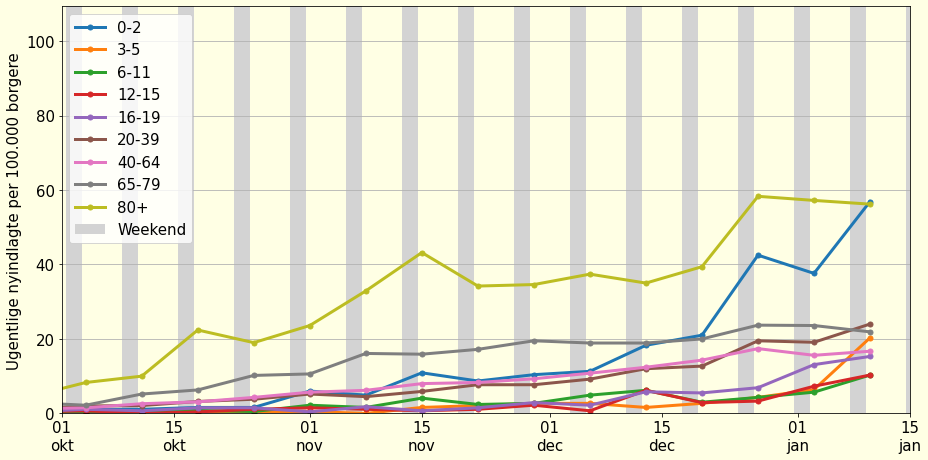

In [6]:
fig,ax1 = plt.subplots(figsize=(13,6.5))

fig.patch.set_facecolor('xkcd:off white')
ax1.set_facecolor('xkcd:off white')

for curAge in dfAge.Aldersgruppe.unique():
    thisdf = dfAge[dfAge.Aldersgruppe == curAge]
    ax1.plot(thisdf.Dato,thisdf['Nyindlagte pr. 100.000 borgere'],'.-',label=curAge)

# Draw weekends
# firstSunday = np.datetime64('2021-01-03')
firstSunday = np.datetime64('2021-10-03')
numWeeks = 52
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')

ax1.set_ylabel('Ugentlige nyindlagte per 100.000 borgere')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=firstDate,right=thisdf.Dato.max()+np.timedelta64(5,'D'))
ax1.set_ylim(bottom=0)
ax1.legend(loc='upper left')
ax1.grid(axis='y')

fig.tight_layout()


fig.savefig(path_figs+'Agedistribution_IndlagteWeekly')

# Stacked

In [7]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(13,13))

fig.patch.set_facecolor('xkcd:off white')
ax1.set_facecolor('xkcd:off white')
ax2.set_facecolor('xkcd:off white')

# Initialize arrays with zeros
thisdf = dfAge[dfAge.Aldersgruppe == '0-2']
curVals = np.zeros(thisdf['Antal positive'].shape)
preVals = np.zeros(thisdf['Antal positive'].shape)

# totCase = dfAge.groupby('Dato')['Antal positive'].sum().values

totCase = np.zeros(thisdf['Antal positive'].shape)

for curAge in dfAge.Aldersgruppe.unique():
    thisdf = dfAge[dfAge.Aldersgruppe == curAge]
    toAdd = thisdf['Antal positive'].values
    totCase = totCase + toAdd  


for curAge in dfAge.Aldersgruppe.unique():
    thisdf = dfAge[dfAge.Aldersgruppe == curAge]

    toAdd = thisdf['Antal positive'].values
    
    curVals = curVals + toAdd  
    # ax1.plot(thisdf.Dato,curVals,'.-',label=curAge)
    ax1.fill_between(thisdf.Dato,curVals,preVals,label=curAge)
    ax2.fill_between(thisdf.Dato,100*curVals/totCase,100*preVals/totCase,label=curAge)

    preVals = curVals

# Draw weekends
# firstSunday = np.datetime64('2021-01-03')
firstSunday = np.datetime64('2021-10-03')
numWeeks = 52
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
    ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,alpha=0.1,facecolor='lightgrey',label=int(k==0)*'Weekend')

ax1.set_ylabel('Ugentlige nye smittetilfælde, stacked')
# ax2.set_ylabel('Ugentlige nye smittetilfælde per 100.000')
ax2.set_ylabel('Andel ud af alle smittetilfælde [%]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=100)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.grid(axis='y')
ax2.grid(axis='y')

fig.tight_layout()


fig.savefig(path_figs+'Agedistribution_CasesWeeklyStacked')

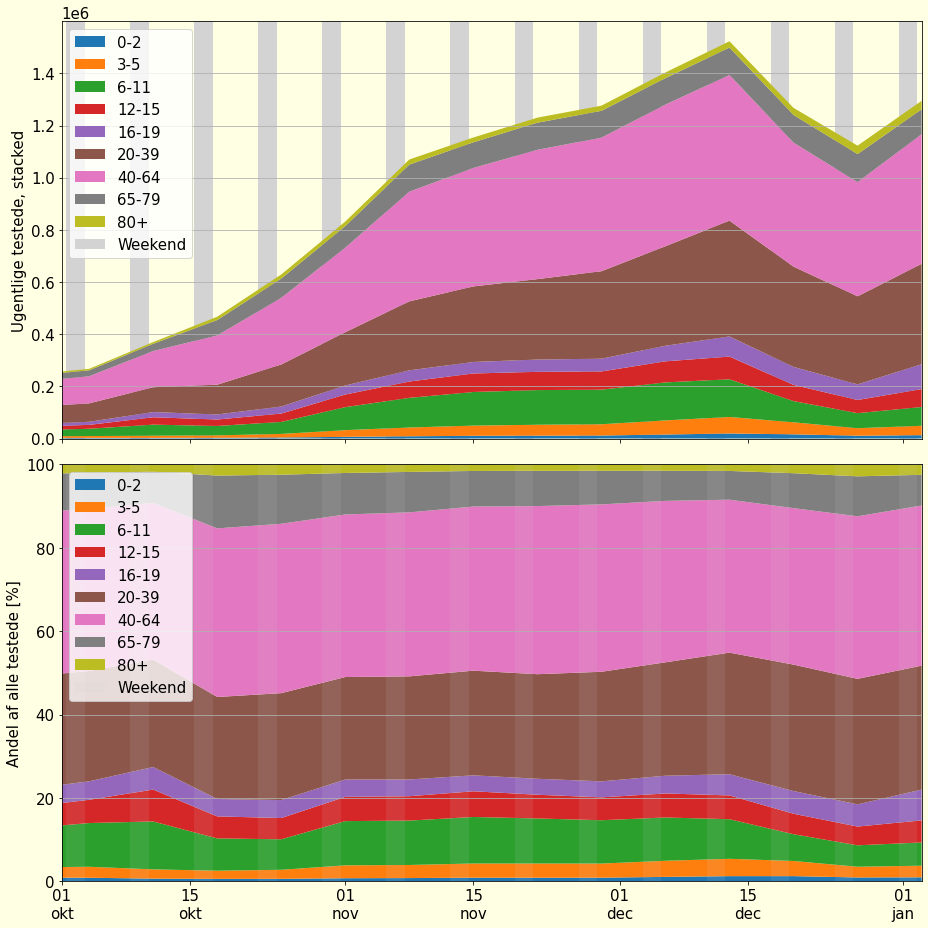

In [ ]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(13,13))

fig.patch.set_facecolor('xkcd:off white')
ax1.set_facecolor('xkcd:off white')
ax2.set_facecolor('xkcd:off white')

# Initialize arrays with zeros
thisdf = dfAge[dfAge.Aldersgruppe == '0-2']
curVals = np.zeros(thisdf['Antal testede'].shape)
preVals = np.zeros(thisdf['Antal testede'].shape)

# totCase = dfAge.groupby('Dato')['Antal testede'].sum().values

totCase = np.zeros(thisdf['Antal testede'].shape)

for curAge in dfAge.Aldersgruppe.unique():
    thisdf = dfAge[dfAge.Aldersgruppe == curAge]
    toAdd = thisdf['Antal testede'].values
    totCase = totCase + toAdd  


for curAge in dfAge.Aldersgruppe.unique():
    thisdf = dfAge[dfAge.Aldersgruppe == curAge]

    toAdd = thisdf['Antal testede'].values
    
    curVals = curVals + toAdd  
    # ax1.plot(thisdf.Dato,curVals,'.-',label=curAge)
    ax1.fill_between(thisdf.Dato,curVals,preVals,label=curAge)
    ax2.fill_between(thisdf.Dato,100*curVals/totCase,100*preVals/totCase,label=curAge)

    preVals = curVals

# Draw weekends
# firstSunday = np.datetime64('2021-01-03')
firstSunday = np.datetime64('2021-10-03')
numWeeks = 52
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
    ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,alpha=0.1,facecolor='lightgrey',label=int(k==0)*'Weekend')

ax1.set_ylabel('Ugentlige testede, stacked')
ax2.set_ylabel('Andel af alle testede [%]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=100)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax1.grid(axis='y')
ax2.grid(axis='y')

fig.tight_layout()


fig.savefig(path_figs+'Agedistribution_TestedeWeeklyStacked')

# OLD BELOW

In [ ]:
# curYears = dfAge.Uge.apply(lambda x: int(x[:4]))

# # Remove everything before 2021
# curdf = dfAge[curYears > 2020].copy()


# weekNums = curdf.Uge.apply(lambda x: int(x[-2:]))


# # Uge 36: 07-09-2021 (tirsdag) og 12-09-2021 (søndag)

# weekOffset = weekNums - 36
# # allDates = weekOffset.apply(lambda x:np.datetime64('2021-09-07') + np.timedelta64(x*7,'D'))
# allDates = weekOffset.apply(lambda x:np.datetime64('2021-09-12') + np.timedelta64(x*7,'D'))

# allDates
# curdf['Dato'] = allDates

In [ ]:


# # fig,ax1 = plt.subplots()
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

# fig.patch.set_facecolor('lightgrey')
# ax1.set_facecolor('lightgrey')
# ax2.set_facecolor('lightgrey')


# curAge = '6-11'

# thisdf = curdf[curdf.Aldersgruppe == curAge]
# curCount = np.zeros(thisdf['Antal positive'].values.shape)
# # ax1.plot(thisdf.Dato,thisdf['Antal positive'],label=curAge)

# prevCount = curCount

# allSums = curdf.groupby('Dato')['Antal positive'].sum().values

# allAgeGroups = curdf.Aldersgruppe.unique()

# cmap = plt.cm.get_cmap('Spectral',len(allAgeGroups)+1)

# counter=0
# for curAge in allAgeGroups:
#     thisdf = curdf[curdf.Aldersgruppe == curAge]
#     # ax1.plot(thisdf.Dato,thisdf['Antal positive'],label=curAge)
#     print(len(thisdf))
#     toAdd = thisdf['Antal positive'].values
#     toAdd = thisdf['Antal positive'].values/7
#     curCount = curCount + toAdd
#     # ax1.plot(thisdf.Dato,curCount,label=curAge)
#     ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     # ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,label=curAge)
#     ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     prevCount = curCount
#     counter = counter+1
    
    
# # Draw weekends
# firstSunday = np.datetime64('2021-01-03')
# numWeeks = 52
# for k in range(0,numWeeks):
#     curSunday = firstSunday + np.timedelta64(7*k,'D')
#     ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
#     ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

# ax1.set_ylabel('Nye smittetilfælde\n[ugentligt gennemsnit, per dag]')
# ax2.set_ylabel('Andel af tilfælde')

# # ax1.plot(thisdf.Dato,allSums,'k:')

# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# ax1.set_xlim(left=firstDate,right=thisdf.Dato.max()+np.timedelta64(5,'D'))
# ax1.set_ylim(bottom=0)
# ax2.set_ylim(bottom=0,top=1)
# ax1.legend(loc='upper left',fontsize=12)
# # ax2.legend(loc='upper left',fontsize=12)
# ax1.grid(axis='y')
# ax2.grid(axis='y')
# fig.tight_layout()


# fig.savefig(path_figs+'Agedistribution_Cases')

In [ ]:


# # fig,ax1 = plt.subplots()
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

# fig.patch.set_facecolor('lightgrey')
# ax1.set_facecolor('lightgrey')
# ax2.set_facecolor('lightgrey')


# curAge = '6-11'

# thisdf = curdf[curdf.Aldersgruppe == curAge]
# curCount = np.zeros(thisdf['Antal positive'].values.shape)
# # ax1.plot(thisdf.Dato,thisdf['Antal positive'],label=curAge)

# prevCount = curCount

# allSums = curdf.groupby('Dato')['Antal positive'].sum().values

# allAgeGroups = curdf.Aldersgruppe.unique()

# cmap = plt.cm.get_cmap('Spectral',len(allAgeGroups)+1)

# counter=0
# for curAge in allAgeGroups:
#     thisdf = curdf[curdf.Aldersgruppe == curAge]
#     # ax1.plot(thisdf.Dato,thisdf['Antal positive'],label=curAge)
#     toAdd = thisdf['Antal positive'].values
#     # toAdd = thisdf['Antal positive'].values/7
#     curCount = curCount + toAdd
#     # ax1.plot(thisdf.Dato,curCount,label=curAge)
#     ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,color=cmap(len(allAgeGroups)-counter),label=curAge)
#     # ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     prevCount = curCount
#     counter = counter+1
    
    
# # Draw weekends
# firstSunday = np.datetime64('2021-01-03')
# numWeeks = 52
# for k in range(0,numWeeks):
#     curSunday = firstSunday + np.timedelta64(7*k,'D')
#     ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
#     ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

# ax1.set_ylabel('Ugentligt nye smittetilfælde')
# ax2.set_ylabel('Andel af tilfælde')

# # ax1.plot(thisdf.Dato,allSums,'k:')

# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
# ax1.set_ylim(bottom=0)
# ax2.set_ylim(bottom=0,top=1)
# ax1.legend(loc='upper left',fontsize=12)
# # ax2.legend(loc='upper left',fontsize=12)
# ax1.grid(axis='y')
# ax2.grid(axis='y')
# fig.tight_layout()


# fig.savefig(path_figs+'Agedistribution_CasesWeekly')

In [ ]:


# fig,ax1 = plt.subplots()
# # fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

# fig.patch.set_facecolor('lightgrey')
# ax1.set_facecolor('lightgrey')
# # ax2.set_facecolor('lightgrey')


# curAge = '6-11'

# thisdf = curdf[curdf.Aldersgruppe == curAge]
# curCount = np.zeros(thisdf['Antal positive'].values.shape)
# # ax1.plot(thisdf.Dato,thisdf['Antal positive'],label=curAge)

# prevCount = curCount

# allSums = curdf.groupby('Dato')['Antal positive'].sum().values

# allAgeGroups = curdf.Aldersgruppe.unique()

# cmap = plt.cm.get_cmap('tab20b',len(allAgeGroups)+1)
# # cmap = plt.cm.get_cmap('inferno',len(allAgeGroups)+5)

# counter=0
# for curAge in allAgeGroups:
#     thisdf = curdf[curdf.Aldersgruppe == curAge]
#     # ax1.plot(thisdf.Dato,thisdf['Antal positive'],label=curAge)
#     toAdd = thisdf['Positive pr. 100.000 borgere'].values
#     # toAdd = thisdf['Antal positive'].values/7
#     # curCount = curCount + toAdd
#     ax1.plot(thisdf.Dato,toAdd,'.-',color=cmap(len(allAgeGroups)-counter),label=curAge)
#     # ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     # # ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,color=cmap(len(allAgeGroups)-counter),label=curAge)
#     # # ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     # prevCount = curCount
#     counter = counter+1
    
    
# # Draw weekends
# firstSunday = np.datetime64('2021-01-03')
# numWeeks = 52
# for k in range(0,numWeeks):
#     curSunday = firstSunday + np.timedelta64(7*k,'D')
#     ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
#     # ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

# ax1.set_ylabel('Ugentligt nye smittetilfælde per 100.000')
# # ax2.set_ylabel('Andel af tilfælde')

# # ax1.plot(thisdf.Dato,allSums,'k:')

# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
# ax1.set_ylim(bottom=0)
# # ax2.set_ylim(bottom=0,top=1)
# ax1.legend(loc='upper left',fontsize=12)
# # ax2.legend(loc='upper left',fontsize=12)
# ax1.grid(axis='y')
# # ax2.grid(axis='y')
# fig.tight_layout()


# fig.savefig(path_figs+'Agedistribution_CasesWeeklyPer100000')

# Testede

In [ ]:
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

# fig.patch.set_facecolor('lightgrey')
# ax1.set_facecolor('lightgrey')
# ax2.set_facecolor('lightgrey')


# curAge = '6-11'

# thisdf = curdf[curdf.Aldersgruppe == curAge]
# curCount = np.zeros(thisdf['Antal testede'].values.shape)
# # ax1.plot(thisdf.Dato,thisdf['Antal testede'],label=curAge)

# prevCount = curCount

# allSums = curdf.groupby('Dato')['Antal testede'].sum().values

# allAgeGroups = curdf.Aldersgruppe.unique()

# cmap = plt.cm.get_cmap('Spectral',len(allAgeGroups)+1)

# counter=0
# for curAge in allAgeGroups:
#     thisdf = curdf[curdf.Aldersgruppe == curAge]
#     # ax1.plot(thisdf.Dato,thisdf['Antal testede'],label=curAge)
#     toAdd = thisdf['Antal testede'].values
#     toAdd = thisdf['Antal testede'].values/7
#     curCount = curCount + toAdd
#     # ax1.plot(thisdf.Dato,curCount,label=curAge)
#     ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     # ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,label=curAge)
#     ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     prevCount = curCount
#     counter = counter+1
    
    
# # Draw weekends
# firstSunday = np.datetime64('2021-01-03')
# numWeeks = 52
# for k in range(0,numWeeks):
#     curSunday = firstSunday + np.timedelta64(7*k,'D')
#     ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
#     ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

# ax1.set_ylabel('Testede \n[ugentligt gennemsnit, per dag]')
# ax2.set_ylabel('Andel af alle testede')


# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
# ax1.set_ylim(bottom=0)
# ax2.set_ylim(bottom=0,top=1)
# ax1.legend(loc='upper left',fontsize=12)
# ax1.grid(axis='y')
# ax2.grid(axis='y')
# fig.tight_layout()


# fig.savefig(path_figs+'Agedistribution_Testede')

In [ ]:


# fig,ax1 = plt.subplots()
# # fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

# fig.patch.set_facecolor('lightgrey')
# ax1.set_facecolor('lightgrey')
# # ax2.set_facecolor('lightgrey')


# curAge = '6-11'

# thisdf = curdf[curdf.Aldersgruppe == curAge]
# curCount = np.zeros(thisdf['Testede pr. 100.000 borgere'].values.shape)
# # ax1.plot(thisdf.Dato,thisdf['Testede pr. 100.000 borgere'],label=curAge)

# prevCount = curCount

# allSums = curdf.groupby('Dato')['Testede pr. 100.000 borgere'].sum().values

# allAgeGroups = curdf.Aldersgruppe.unique()

# cmap = plt.cm.get_cmap('tab20b',len(allAgeGroups)+1)
# # cmap = plt.cm.get_cmap('inferno',len(allAgeGroups)+5)

# counter=0
# for curAge in allAgeGroups:
#     thisdf = curdf[curdf.Aldersgruppe == curAge]
#     # ax1.plot(thisdf.Dato,thisdf['Antal Testede'],label=curAge)
#     toAdd = thisdf['Testede pr. 100.000 borgere'].values
#     # toAdd = thisdf['Antal Testede'].values/7
#     # curCount = curCount + toAdd
#     ax1.plot(thisdf.Dato,toAdd,'.-',color=cmap(len(allAgeGroups)-counter),label=curAge)
#     # ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     # # ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,color=cmap(len(allAgeGroups)-counter),label=curAge)
#     # # ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     # prevCount = curCount
#     counter = counter+1
    
    
# # Draw weekends
# firstSunday = np.datetime64('2021-01-03')
# numWeeks = 52
# for k in range(0,numWeeks):
#     curSunday = firstSunday + np.timedelta64(7*k,'D')
#     ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
#     # ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

# ax1.set_ylabel('Ugentligt testede per 100.000')
# # ax2.set_ylabel('Andel af tilfælde')

# # ax1.plot(thisdf.Dato,allSums,'k:')

# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
# ax1.set_ylim(bottom=0)
# # ax1.set_ylim(top = 25000)
# # ax2.set_ylim(bottom=0,top=1)
# ax1.legend(loc='upper left',fontsize=12)
# # ax2.legend(loc='upper left',fontsize=12)
# ax1.grid(axis='y')
# # ax2.grid(axis='y')
# fig.tight_layout()


# fig.savefig(path_figs+'Agedistribution_TestedeWeeklyPer100000')

In [ ]:


# fig,ax1 = plt.subplots()
# fig.patch.set_facecolor('lightgrey')
# ax1.set_facecolor('lightgrey')


# curAge = '6-11'

# thisdf = curdf[curdf.Aldersgruppe == curAge]
# curCount = np.zeros(thisdf['Antal testede'].values.shape)

# prevCount = curCount

# allSums = 100*curdf.groupby('Dato')['Antal positive'].sum().values/curdf.groupby('Dato')['Antal testede'].sum().values

# allAgeGroups = curdf.Aldersgruppe.unique()

# cmap = plt.cm.get_cmap('tab20b',len(allAgeGroups)+1)

# counter=0
# for curAge in allAgeGroups:
#     thisdf = curdf[curdf.Aldersgruppe == curAge]
    
#     toAdd = 100*thisdf['Antal positive'].values/thisdf['Antal testede'].values 
    
#     ax1.plot(thisdf.Dato,toAdd,'.-',color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     counter = counter+1
    
    
# # Draw weekends
# firstSunday = np.datetime64('2021-01-03')
# numWeeks = 52
# for k in range(0,numWeeks):
#     curSunday = firstSunday + np.timedelta64(7*k,'D')
#     ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')

# ax1.set_ylabel('Positive percentage [%]')

# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
# ax1.set_ylim(bottom=0)
# # ax1.set_ylim(top = 25000)
# ax1.legend(loc='upper left',fontsize=12)
# ax1.grid(axis='y')
# fig.tight_layout()


# fig.savefig(path_figs+'Agedistribution_PosPct')

# Indlagte

In [ ]:
# print(curdf.tail(9).sum())
# display(curdf.tail(9))
# print((6324+25698+ 88230)/831807)
# print((189.0+522.0+ 3459.0)/15867.0)
# # Testede pr. 100.000 borgere

In [ ]:
# curdf['Nyindlagte pr. 100.000 borgere']
# curdf

In [ ]:
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

# fig.patch.set_facecolor('lightgrey')
# ax1.set_facecolor('lightgrey')
# ax2.set_facecolor('lightgrey')


# curAge = '6-11'

# thisdf = curdf[curdf.Aldersgruppe == curAge]
# curCount = np.zeros(thisdf['Nyindlagte pr. 100.000 borgere'].values.shape)
# # ax1.plot(thisdf.Dato,thisdf['Nyindlagte pr. 100.000 borgere'],label=curAge)

# prevCount = curCount

# allSums = curdf.groupby('Dato')['Nyindlagte pr. 100.000 borgere'].sum().values

# allAgeGroups = curdf.Aldersgruppe.unique()

# cmap = plt.cm.get_cmap('Spectral',len(allAgeGroups)+1)

# counter=0
# for curAge in allAgeGroups:
#     thisdf = curdf[curdf.Aldersgruppe == curAge]
#     # ax1.plot(thisdf.Dato,thisdf['Nyindlagte pr. 100.000 borgere'],label=curAge)
#     toAdd = thisdf['Nyindlagte pr. 100.000 borgere'].values
#     toAdd = thisdf['Nyindlagte pr. 100.000 borgere'].values/7
#     curCount = curCount + toAdd
#     # ax1.plot(thisdf.Dato,curCount,label=curAge)
#     ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     # ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,label=curAge)
#     ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     prevCount = curCount
#     counter = counter+1
    
    
# # Draw weekends
# firstSunday = np.datetime64('2021-01-03')
# numWeeks = 52
# for k in range(0,numWeeks):
#     curSunday = firstSunday + np.timedelta64(7*k,'D')
#     ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
#     ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

# ax1.set_ylabel('Nyindlæggelser \n[ugentligt gennemsnit, per dag]')
# ax2.set_ylabel('Andel af alle nyindlagte')


# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
# ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
# ax1.set_ylim(bottom=0)
# ax2.set_ylim(bottom=0,top=1)
# ax1.legend(loc='upper left',fontsize=12)
# ax1.grid(axis='y')
# ax2.grid(axis='y')
# fig.tight_layout()


# fig.savefig(path_figs+'Agedistribution_NyindlagtePer100000')

In [ ]:


# fig,ax1 = plt.subplots()
# # fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

# fig.patch.set_facecolor('lightgrey')
# ax1.set_facecolor('lightgrey')
# # ax2.set_facecolor('lightgrey')


# curAge = '6-11'

# thisdf = curdf[curdf.Aldersgruppe == curAge]
# curCount = np.zeros(thisdf['Nyindlagte pr. 100.000 borgere'].values.shape)

# prevCount = curCount

# allSums = 100*curdf.groupby('Dato')['Nyindlagte pr. 100.000 borgere'].sum().values

# allAgeGroups = curdf.Aldersgruppe.unique()

# cmap = plt.cm.get_cmap('tab20b',len(allAgeGroups)+1)
# # cmap = plt.cm.get_cmap('inferno',len(allAgeGroups)+5)

# counter=0
# for curAge in allAgeGroups:
#     thisdf = curdf[curdf.Aldersgruppe == curAge]
#     toAdd = 100*thisdf['Nyindlagte pr. 100.000 borgere'].values
#     # toAdd = thisdf['Antal Testede'].values/7
#     # curCount = curCount + toAdd
#     ax1.plot(thisdf.Dato,toAdd,'.-',color=cmap(len(allAgeGroups)-counter),label=curAge)
#     # ax1.fill_between(thisdf.Dato,curCount,prevCount,color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     # # ax2.fill_between(thisdf.Dato,curCount/allSums,prevCount/allSums,color=cmap(len(allAgeGroups)-counter),label=curAge)
#     # # ax2.fill_between(thisdf.Dato,curCount/(allSums/7),prevCount/(allSums/7),color=cmap(len(allAgeGroups)-counter),label=curAge)
    
#     # prevCount = curCount
#     counter = counter+1
    
    
# # Draw weekends
# firstSunday = np.datetime64('2021-01-03')
# numWeeks = 52
# for k in range(0,numWeeks):
#     curSunday = firstSunday + np.timedelta64(7*k,'D')
#     ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='grey',label=int(k==0)*'Weekend')
#     # ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=1,facecolor='lightgrey',alpha=0.25,label=int(k==0)*'Weekend')

# ax1.set_ylabel('Ugentlige nyindlæggelser per 100.000')

# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# ax1.set_xlim(left=firstDate,right=thisdf.Dato.max())
# ax1.set_ylim(bottom=0)
# ax1.set_ylim(top = 5000)
# ax1.legend(loc='upper left',fontsize=12)
# # ax2.legend(loc='upper left',fontsize=12)
# ax1.grid(axis='y')
# # ax2.grid(axis='y')
# fig.tight_layout()


# fig.savefig(path_figs+'Agedistribution_AdmissionsWeeklyPer100000')